In [1]:
# Panda and Numpy
import pandas as pd
import numpy as np

In [2]:
# Selenium
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait

In [3]:
# Beautiful Soup
from bs4 import BeautifulSoup

In [4]:
# Matplotlib inculding magic function used by iPython/Jupyter
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Chrome Options
chrome_options = Options()
#chrome_options.add_argument("--disable-extensions")
#chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--headless")

# Turn options
capabilities = chrome_options.to_capabilities()

# URL
url = "https://www.google.com/travel/explore?tfc=ciIKDgoMCggvbS8wNWQ0ORAEEg4KDAoIL20vMDJqOXoQBiAAciIKDgoMCggvbS8wMmo5ehAGEg4KDAoIL20vMDVkNDkQBCAAGAEqAhACMAE6AggB"

#Desired Capabilities stored in a dictionary
dcap = dict(capabilities)
dcap["chrome.page.settings.userAgent"] = ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36")    

# Fire up the webdriver
driver = Chrome(desired_capabilities=dcap,service_args=["--ignore-ssl-errors=true"])
driver.implicitly_wait(20)
driver.set_window_position(0, 0)
driver.set_window_size(1366, 768)
driver.get(url)

# Check if cities elements have been created
def cities_prices_elements(driver):
    return driver.find_elements_by_css_selector(".NLAKyb.pJYzRb")

WebDriverWait(driver, timeout=120).until(cities_prices_elements)
driver.save_screenshot(r'flight_explorer.png')

True

In [6]:
# Beautiful Soup to parse the Selenium Page
s = BeautifulSoup(driver.page_source, "html.parser")
if s:
    print('Beautiful Soup has successfully parsed the html document')

Beautiful Soup has successfully parsed the html document


In [9]:
# Get Fares Tags
cities = s.findAll('div', 'WuT5Gd')
all_cities = dict()

for city in cities:
    name = city.find('div', 'czmTnd tdMWuf')
    price = city.find('div', 'NLAKyb pJYzRb')
    if price.text and name.text:
        all_cities[name.text] = int(price.text.replace('KES','').replace(',',''))

# europe_prices_tag
# all_europe_prices[europe_city_names] = europe_prices_tag
all_cities

{'Washington, D.C.': 75920,
 'Rome': 67160,
 'New York': 76345,
 'London': 71320,
 'Boston': 76105,
 'Berlin': 77520,
 'Amsterdam': 65230,
 'Paris': 66705,
 'Milan': 72140,
 'Brussels': 64520,
 'Cairo': 50470,
 'Cape Town': 54980,
 'Helsinki': 79625,
 'Manchester': 82830,
 'Bangkok': 81280,
 'Chicago': 90435,
 'Vancouver': 143245,
 'Geneva': 62735,
 'San Francisco': 136415,
 'Los Angeles': 113480,
 'Atlanta': 104685,
 'Frankfurt': 67945,
 'Johannesburg': 41575,
 'Dallas': 100770,
 'Singapore': 93490,
 'Tokyo': 100310,
 'Dubai': 63690,
 'Stockholm': 68570,
 'Zürich': 72490,
 'Mount Kilimanjaro': 34645,
 'Kuala Lumpur': 83945,
 'Seattle': 141540,
 'Entebbe': 22800,
 'Athens': 80390,
 'Toronto': 114760,
 'Melbourne': 170935,
 'Mexico City': 165360,
 'Guangzhou': 73465,
 'Calgary': 143670,
 'Hong Kong': 100615,
 'New Delhi': 75400,
 'Sydney': 185845,
 'Mombasa': 11760,
 'Havana': 123820,
 'Miami': 134960,
 'Mauritius Island': 92105,
 'İstanbul': 95165,
 'Mumbai': 88415,
 'Houston': 130665,

In [12]:
fares = pd.DataFrame.from_dict(all_cities, orient='index', columns=['Price'])

In [13]:
fares

,Price
"Washington, D.C.",75920
Rome,67160
New York,76345
London,71320
Boston,76105
...,...
Abu Dhabi,143960
Mamoudzou,108985
Livingstone,53950
Pemba,359595


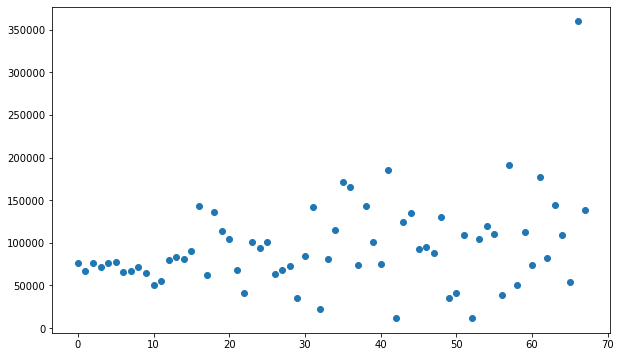

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
fares['Price']
plt.scatter(np.arange(len(fares)), fares['Price'])

In [19]:
px = [x for x in fares['Price']]
ff = pd.DataFrame(px, columns=['fare'])

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler